# Ultra Diffuse Galaxies Data Analysis

### Imports

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
from IPython.display import clear_output

from cube_cut import cut_cube
from run_barycentric import barycentric_correction
from spectra_stacker_gen2 import spectra_stack
from ppxf_kinematics import ppxf_kinematics

warnings.filterwarnings('ignore')

### step 1: clean spectra

['/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/F8D1/kb201213_00077_ocubes.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/F8D1/kb201213_00078_ocubes.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/F8D1/kb201213_00079_ocubes.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/F8D1/kb201213_00080_ocubes.fits']
/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/F8D1/kb201213_00077_ocubes.fits 4808.75
/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/F8D1/kb201213_00078_ocubes.fits 4808.75
/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/F8D1/kb201213_00079_ocubes.fits 4808.75
/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/F8D1/kb201213_00080_ocubes.fits 4808.75
The

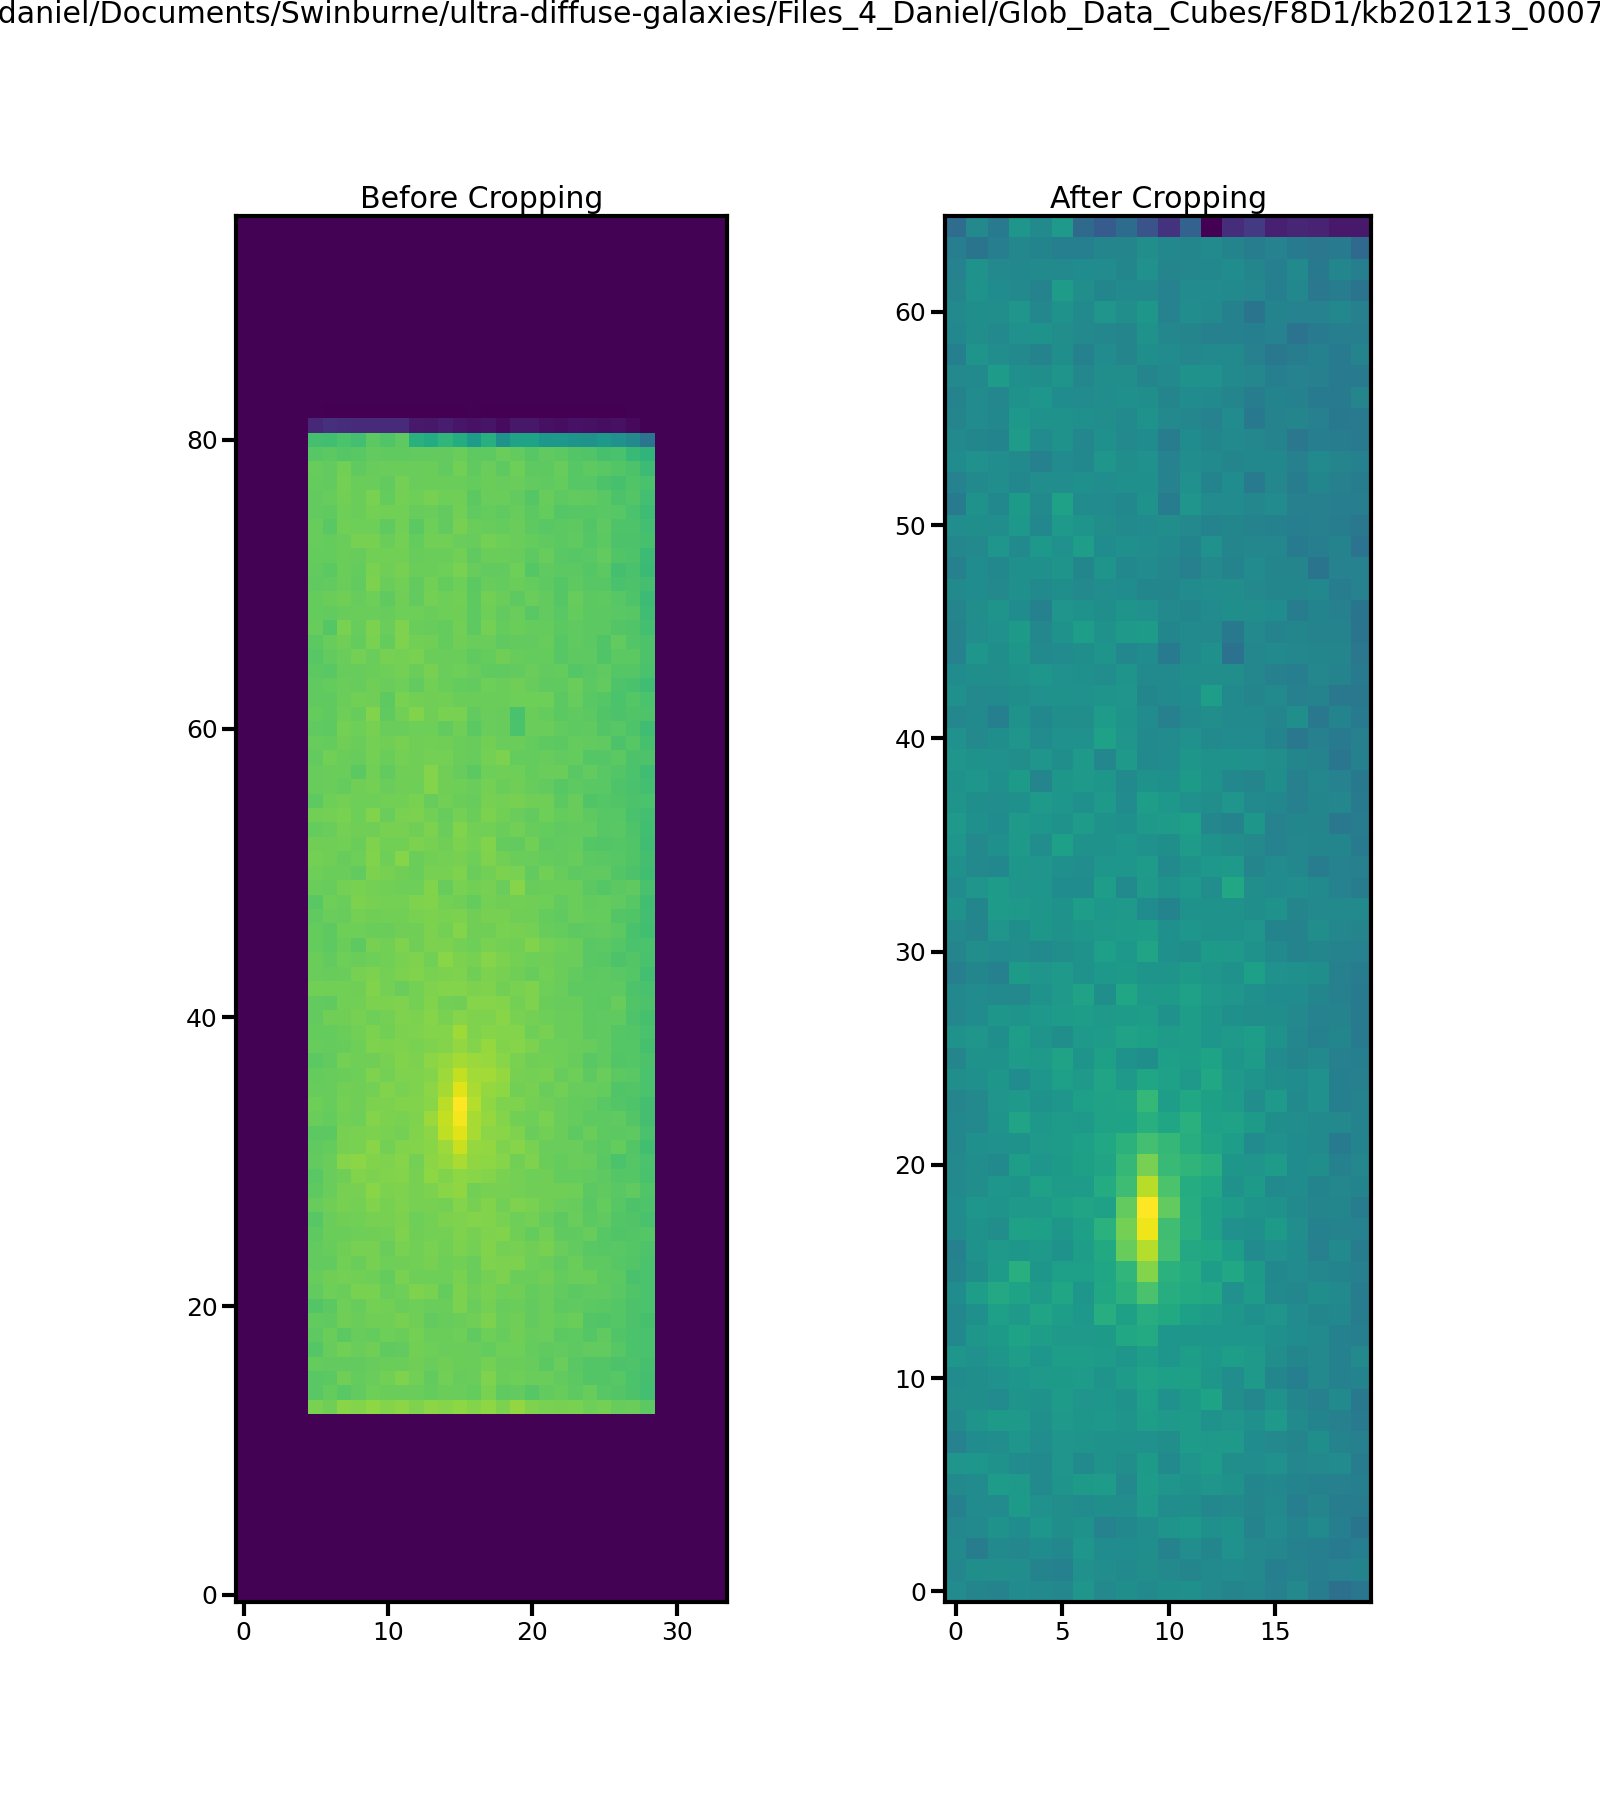

Files Written out


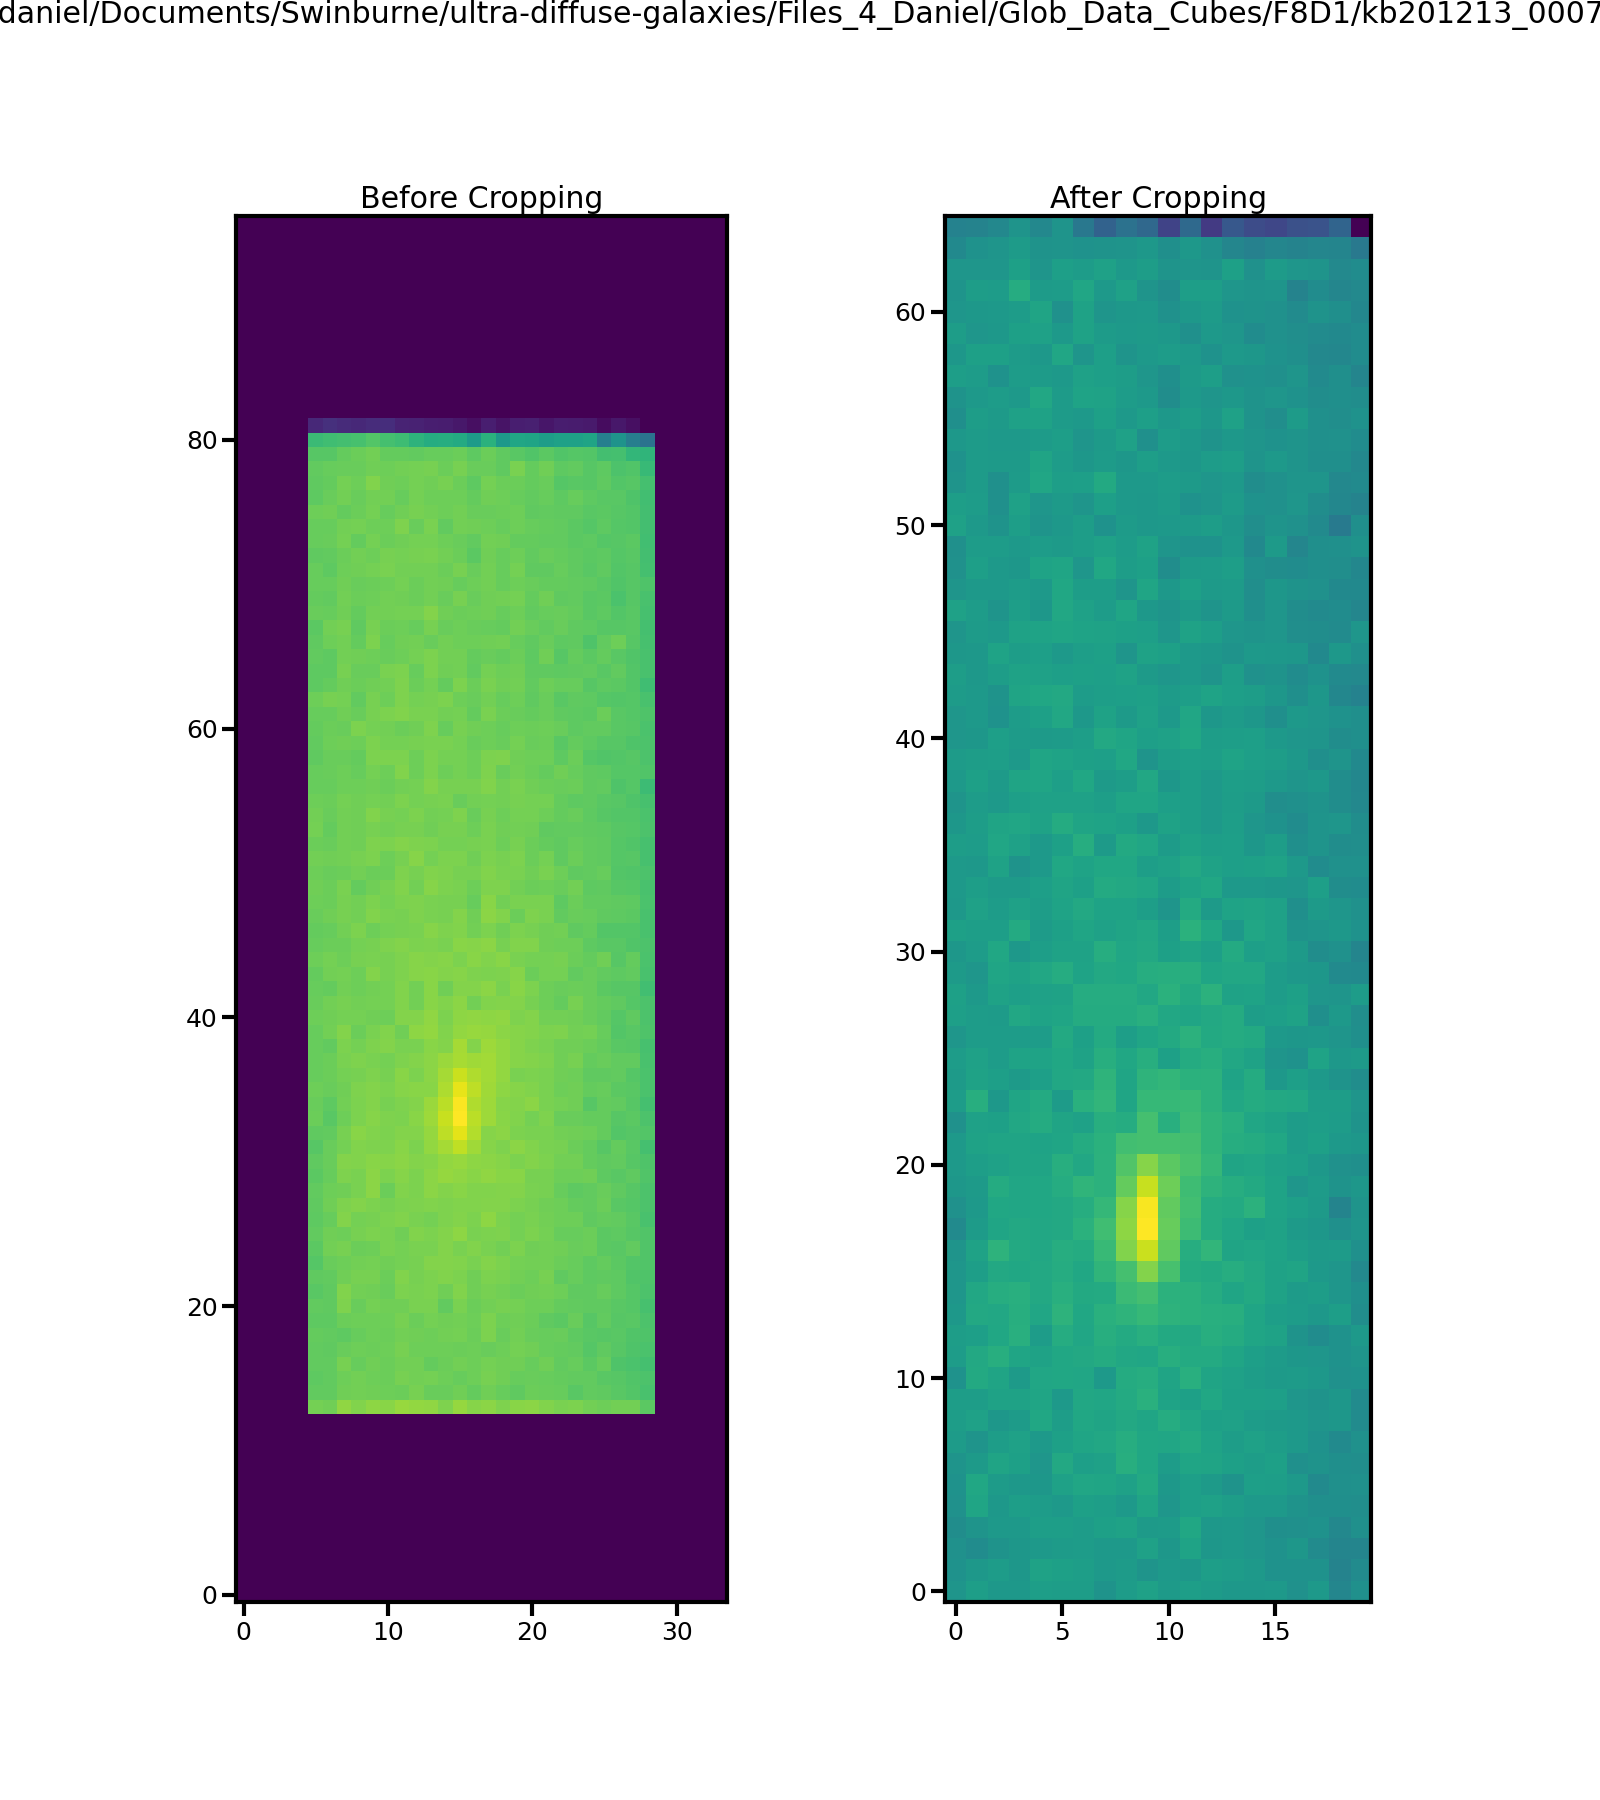

Files Written out


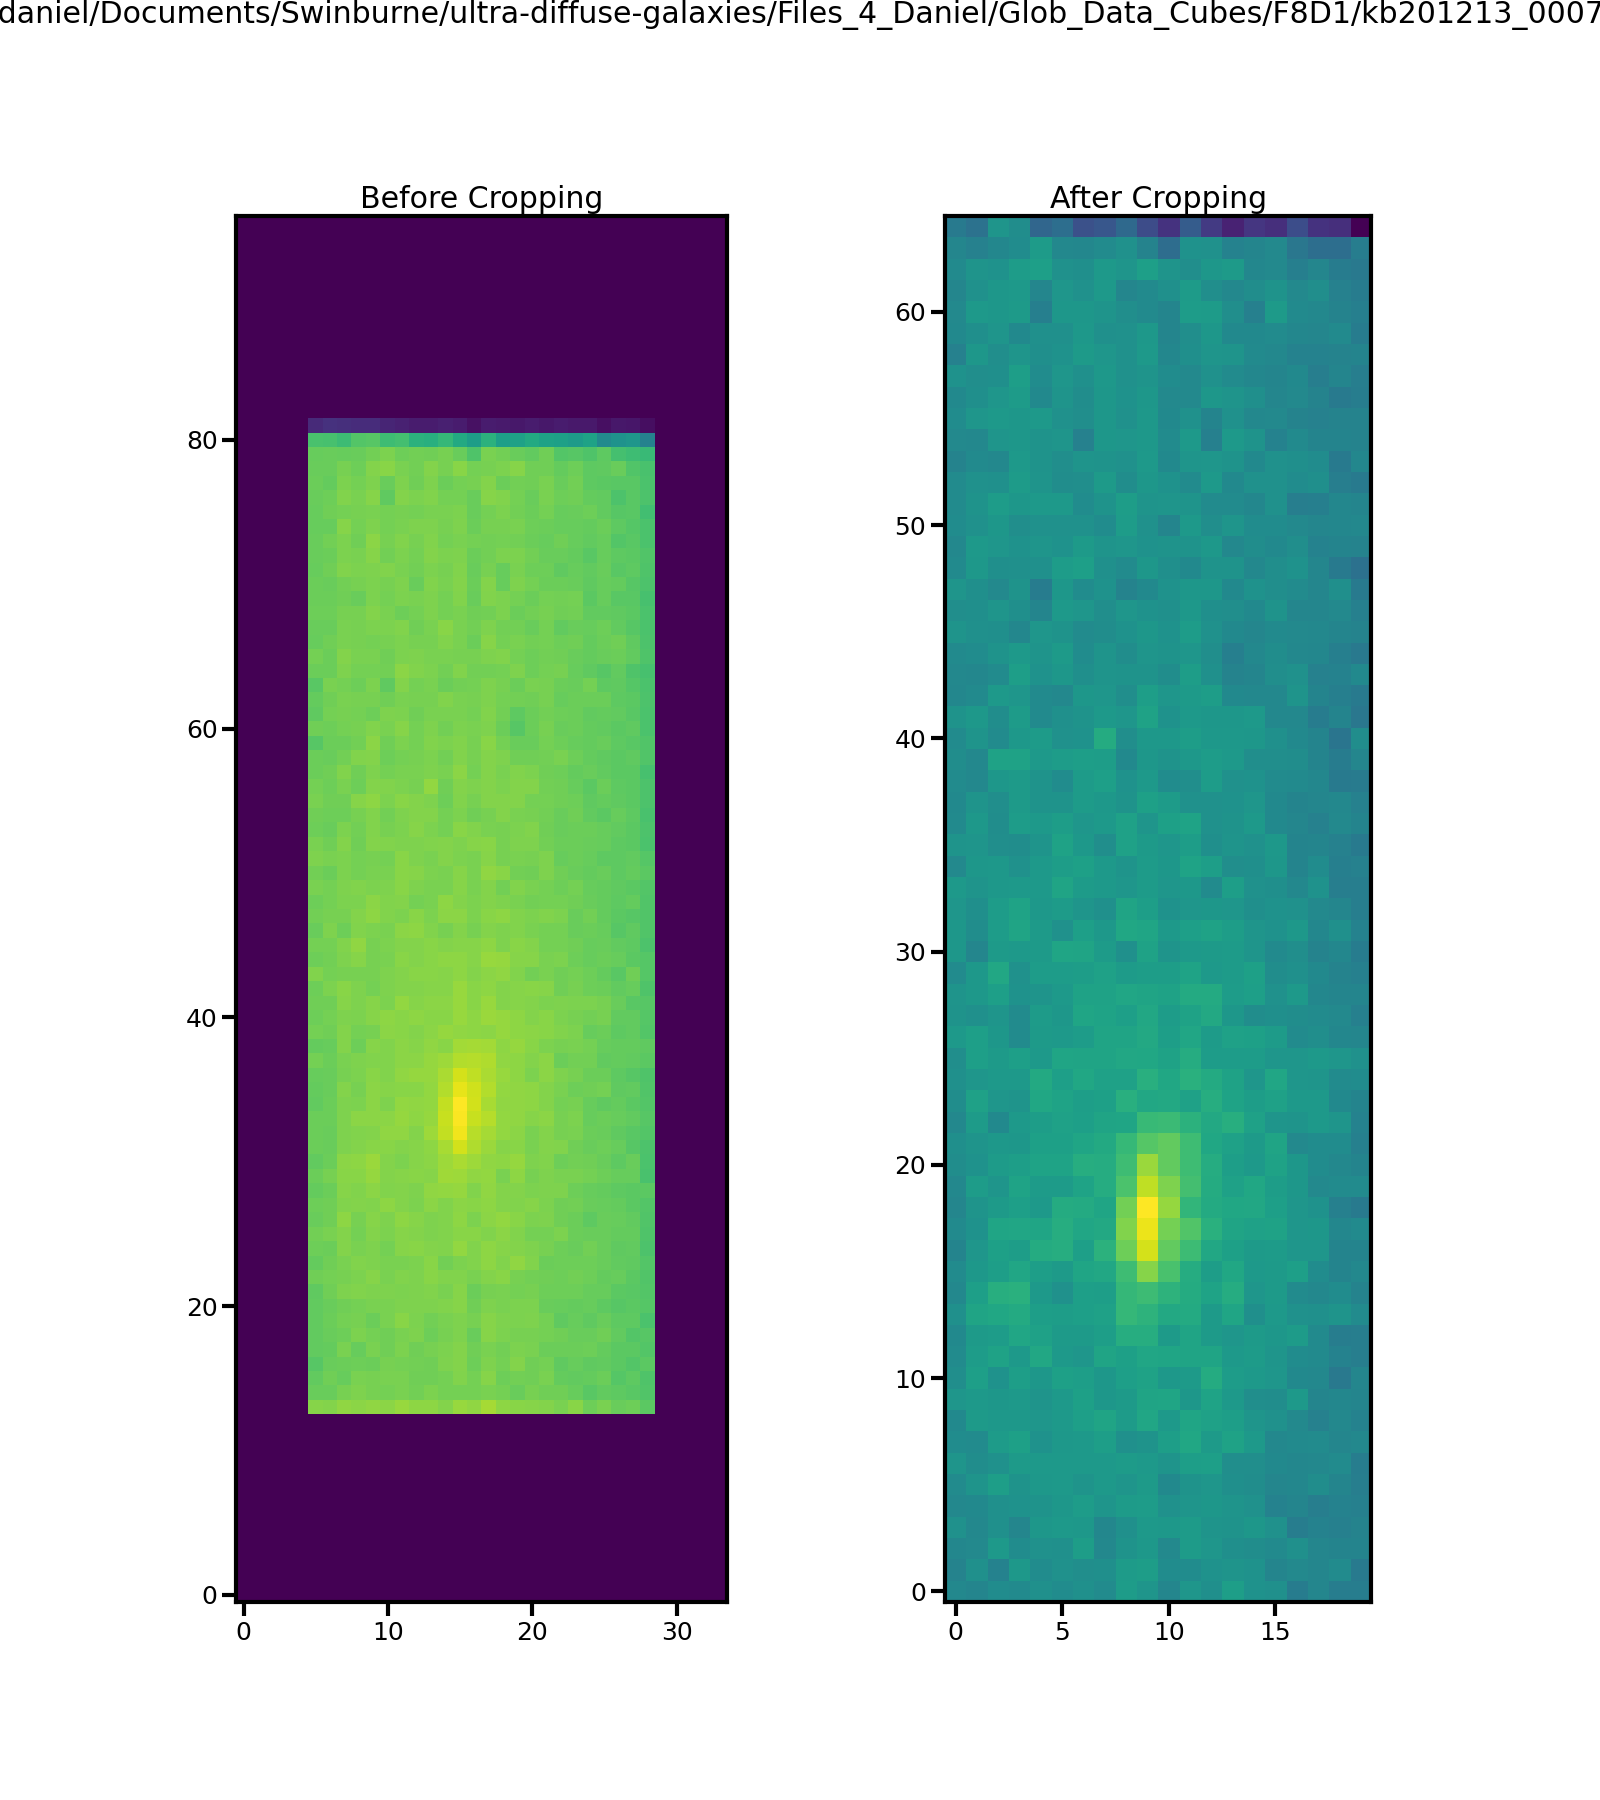

Files Written out


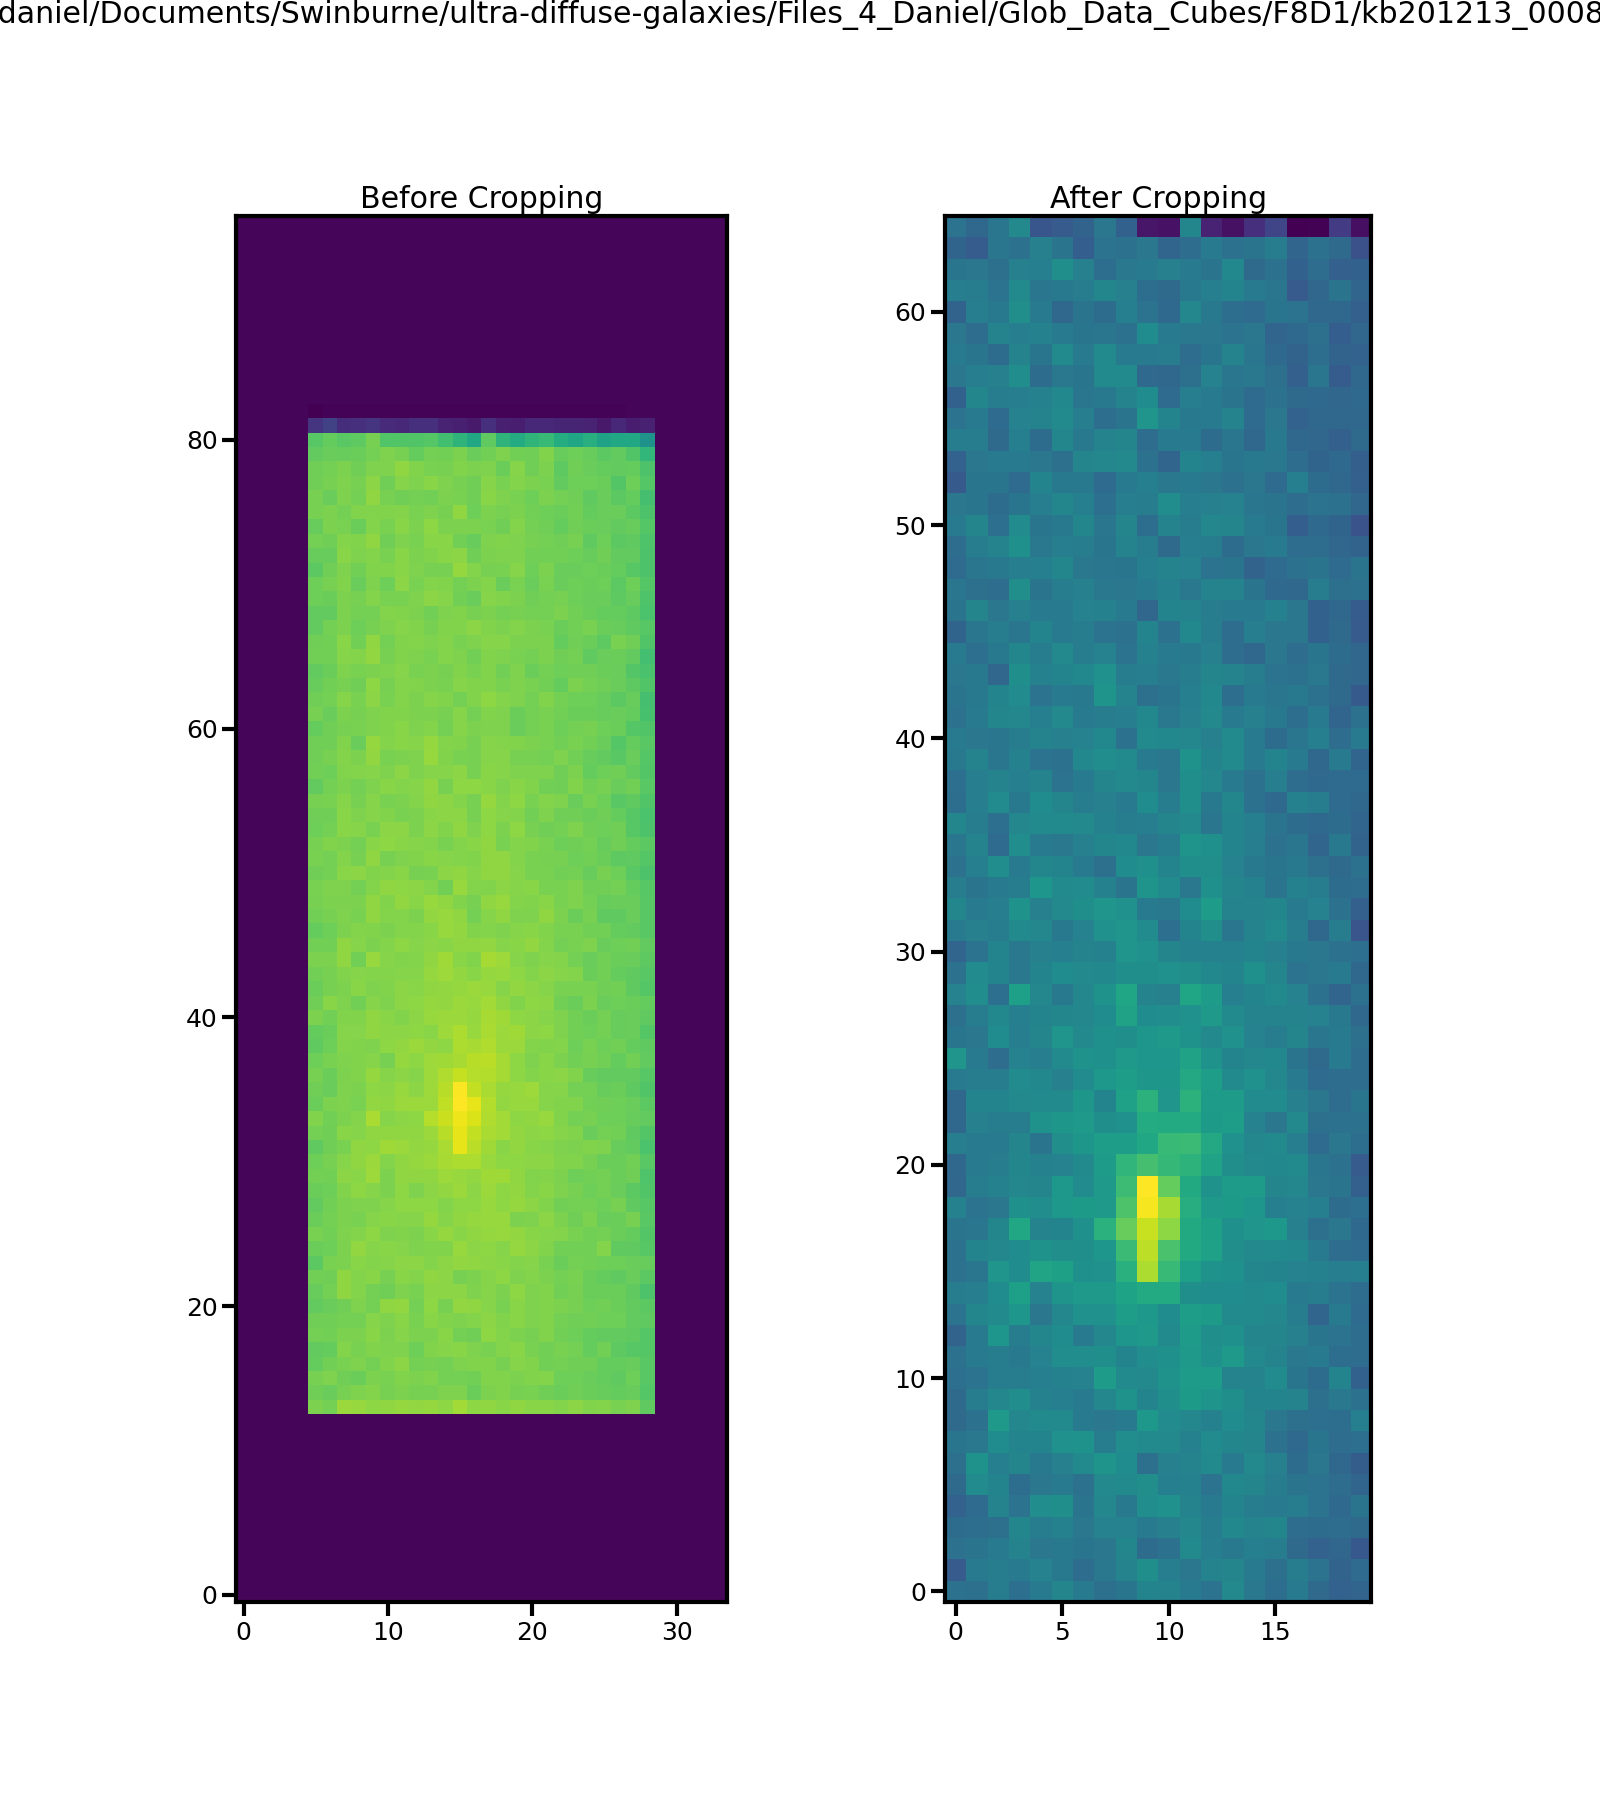

Files Written out
Code Competed Successfully in, 16.47 seconds


In [3]:
""" User inputs """
s1_file_directory = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/F8D1/' # path to directory containing spectra
s1_file_keyword = '*kb*ocubes*' # keyword to find files in directory
x_low = 7 # lowest and highest xvalue of the spaxel to be INCLUDED in the rectangle
x_high = 26
y_low = 17 # lowest and highest yvalue of the spaxel to be INCLUDED in the rectangle
y_high = 81

cut_cube(s1_file_directory, s1_file_keyword, x_low, x_high, y_low, y_high)

### step 1.5: extract spectra
open qfitsview and create `.fits` file for all objects in the cut files 

### step 2: barycentric correction

In [2]:
""" User inputs """
s2_file_directory = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/F8D1/obj1/' # path to directory containing spectra
s2_file_keyword = '[0-9]*.fits' # keyword to find files in directory
corrections = 'auto' # 'manual' or 'automatic'

if corrections == 'manual':
    bary_corr = np.array([0]) # Manual barycentric correction in km/s. One number for each file!
    # INPUT MANUAL ABOVE ^^^^^^
else:
    bary_corr = barycentric_correction(s2_file_directory, s2_file_keyword)
    bary_corr = np.array(bary_corr)
    if np.all(bary_corr > 0):
        bary_corr = -bary_corr
        print('ensured bary_corr is negative')
    
print(f'Barycentric correction: {bary_corr} km/s')
print(f'Delta correction: {np.diff(bary_corr)} km/s')
plt.close()

The Barycentric correction is: 30.389707839392177 km/s
The Barycentric correction is: 30.401964164675622 km/s
The Barycentric correction is: 30.410613926314845 km/s
The Barycentric correction is: 30.415605411429233 km/s
ensured bary_corr is negative
Barycentric correction: [-30.38970784 -30.40196416 -30.41061393 -30.41560541] km/s
Delta correction: [-0.01225633 -0.00864976 -0.00499149] km/s


### step 3: spectra stacking
must run for all objects

list of files: ['/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/F8D1/obj1/77.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/F8D1/obj1/78.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/F8D1/obj1/79.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/F8D1/obj1/80.fits']
[4860.5  4860.75 4861.   ... 5336.5  5336.75 5337.  ]


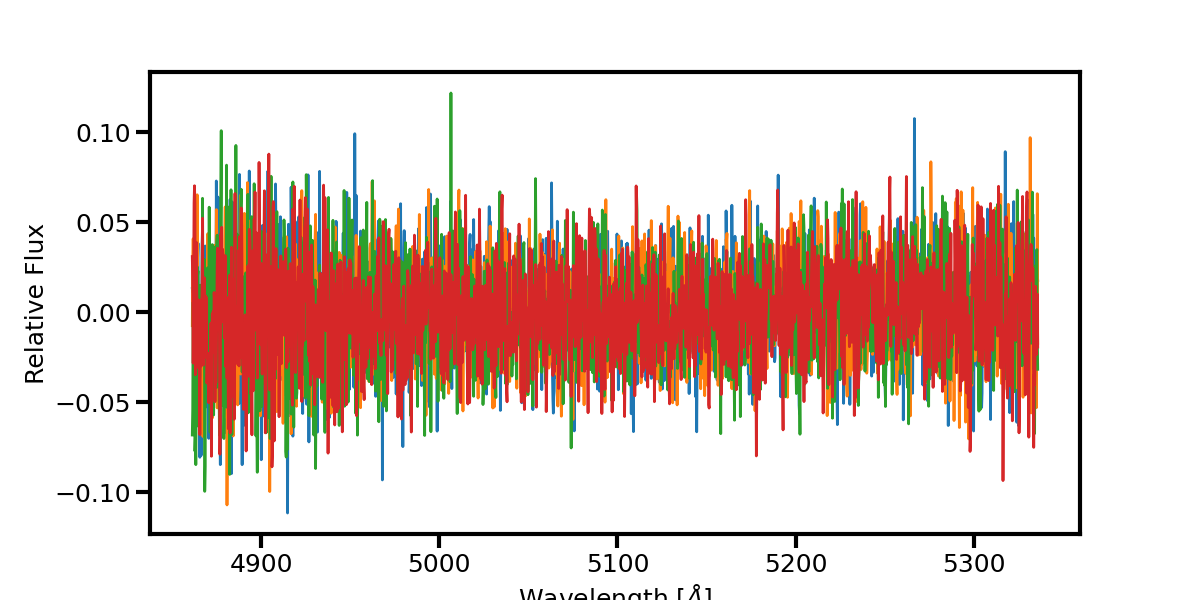

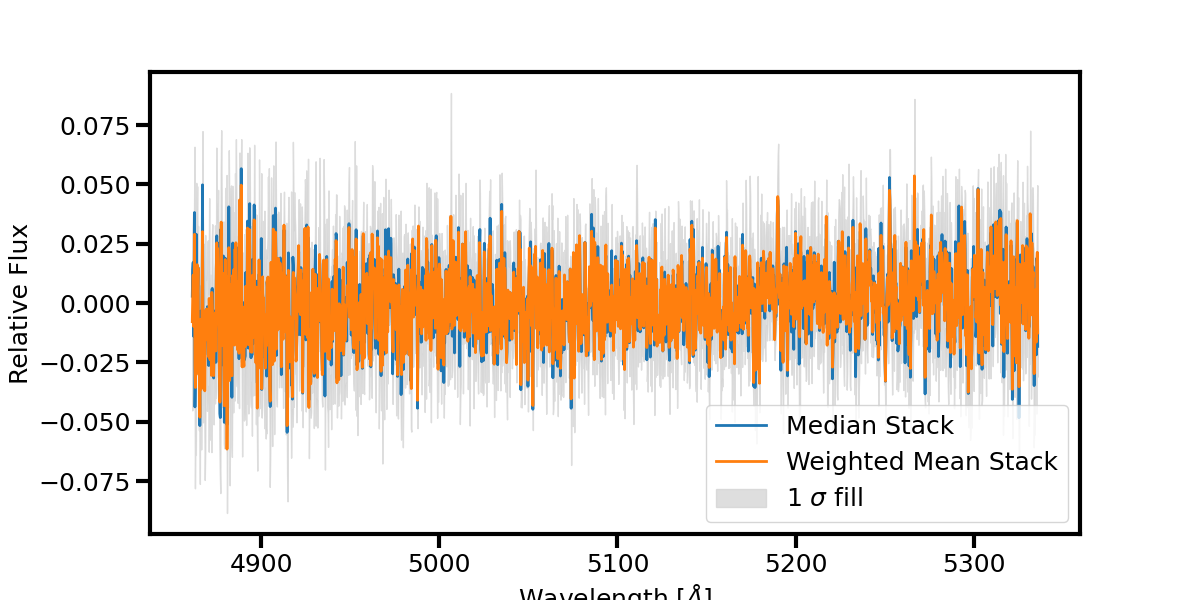

OSError: File '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/F8D1/obj1/mean.fits' already exists.

In [3]:
""" User inputs """
s3_file_directory = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/F8D1/obj1/' # path to directory containing spectra
s3_file_keyword = '[0-9]*.fits' # keyword to find files in directory
overwrite = False # if True, will overwrite any existing files. Proceed with caution, probably best to set False

plt.close()
spectra_stack(s3_file_directory, s3_file_keyword, bary_corr, overwrite)
# plot 1: spectra
# plot 2: stack

### step 4.1: Check ppxf velocities of degrees

100%|██████████| 30/30 [00:46<00:00,  1.56s/it]


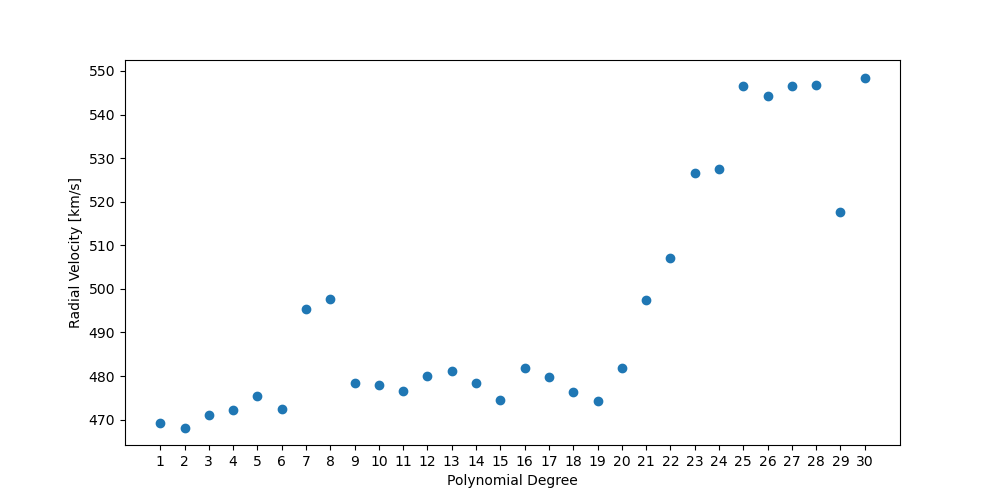

In [3]:
""" User inputs """
ppxf_file = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/F8D1/obj1/mean_NCS.fits' # path to ppxf input file
fwhm_gal = 5000 / 1800 # instrument resolution
min_degrees, max_degrees = 1, 30 # min and max degrees for Legendre polynomials

degrees = np.arange(min_degrees, max_degrees+1) # make a list of numbers to test for degree
velocities = []
for deg in tqdm(degrees):
    vel, sigma, h3, h4 = ppxf_kinematics(ppxf_file, fwhm_gal, deg)
    clear_output(wait=True)
    velocities.append(vel)
plt.close()

plt.figure(figsize=(10, 5))
plt.scatter(degrees, velocities)
plt.xlabel("Polynomial Degree")
plt.ylabel("Radial Velocity [km/s]")
plt.xticks(np.arange(min(degrees), max(degrees)+1, 1.0))
plt.show()

### step 4.2 ppxf with best degree

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:       478         6    -0.000    -0.000
chi2/DOF: 4699.; DOF: 1592; degree = 9; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 42; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 2/150
Formal errors:
     dV    dsigma   dh3      dh4
      64      44     7.4     1.2
Elapsed time in pPXF: 0.36 s
Best-fitting redshift z = 0.00160 +/- 0.00022
Signal-to-noise ratio per pixel: 8.63
2.525817595529477 0.29278967624907404


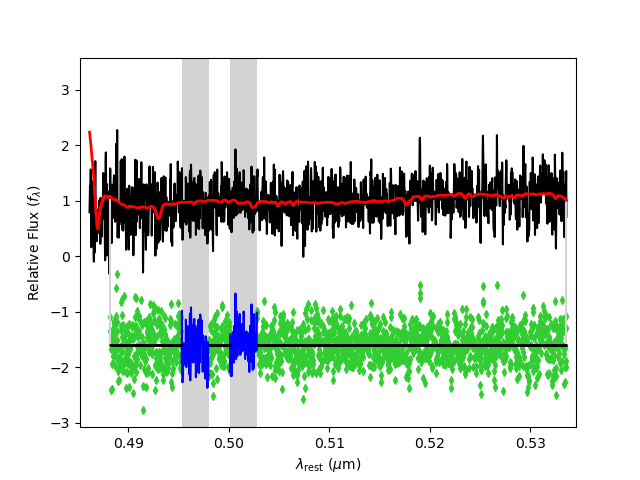

(478.3234242993033,
 6.475550922276609,
 0.001596788713977615,
 0.00021545484437215218)

In [24]:
""" User inputs """
degree = 9

plt.close()
ppxf_kinematics(ppxf_file, fwhm_gal, degree)